### Importing the Dataset

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [74]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Taking the Taxis dataset

> Now let's make a regression model on the dataset to predict the total fare based on the other numerical columns

In [75]:
taxis_df = sns.load_dataset('taxis')
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


#### Preprocessing the Data

In [76]:
taxis_df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


Checking it's shape, tell's us no of rows and columns

In [77]:
taxis_df.shape

(6433, 14)

Checking the number of null values in the dataset

In [78]:
taxis_df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

> Since there are no null values in the numerical columns we need no need to remove or process the null values

### Taking X and Y columns for Regression Model

In [79]:
X = taxis_df.iloc[:,2:7]
X

,passengers,distance,fare,tip,tolls
0,1,1.60,7.0,2.15,0.0
1,1,0.79,5.0,0.00,0.0
2,1,1.37,7.5,2.36,0.0
3,1,7.70,27.0,6.15,0.0
4,3,2.16,9.0,1.10,0.0
...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0
6429,1,18.74,58.0,0.00,0.0
6430,1,4.14,16.0,0.00,0.0
6431,1,1.12,6.0,0.00,0.0


In [80]:
y = taxis_df['total']
y

0       12.95
1        9.30
2       14.16
3       36.95
4       13.40
        ...  
6428     6.36
6429    58.80
6430    17.30
6431     6.80
6432    20.16
Name: total, Length: 6433, dtype: float64

### Training the model

##### Train-test Split

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.20,random_state=42)

##### LinearRegression Model

In [82]:
#Fit the linear model
# instantiate the linear regression object

from sklearn.linear_model import LinearRegression
mlr= LinearRegression()

#train the model using training data
mlr.fit(X_train,y_train)

LinearRegression()

##### Taking the prediction into y_pred

In [83]:
#predict on the test data

y_pred = mlr.predict(X_test)

##### Checking Error Metrics

In [84]:
#Calculate and print r2_score

#Calculate and print metrics

from sklearn import metrics
print("R2 Score Value : {:.4f}".format(metrics.r2_score(y_test,y_pred)))
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Square Error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score Value : 0.9941
Mean Absolute Error :  0.7654058497299439
Mean Square Error :  1.1062064161753877
Root Mean Square Error :  1.0517634791983357


#### Standardization

In [85]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X)

In [86]:
print(transformed_df)

[[-0.44800377 -0.37219881 -0.52732421  0.06975269 -0.22984922]
 [-0.44800377 -0.58382136 -0.7004708  -0.80838282 -0.22984922]
 [-0.44800377 -0.43228917 -0.48403756  0.15552407 -0.22984922]
 ...
 [-0.44800377  0.29140769  0.25183542 -0.80838282 -0.22984922]
 [-0.44800377 -0.49760477 -0.6138975  -0.80838282 -0.22984922]
 [-0.44800377  0.21564159  0.16526213  0.56395919 -0.22984922]]


In [87]:
covariance_matrix = np.cov(transformed_df.T)

In [88]:
print(covariance_matrix)

[[ 1.00015547  0.00941257  0.00763824  0.02110258 -0.00290351]
 [ 0.00941257  1.00015547  0.92025075  0.45265902  0.63536615]
 [ 0.00763824  0.92025075  1.00015547  0.48868837  0.60940165]
 [ 0.02110258  0.45265902  0.48868837  1.00015547  0.4136831 ]
 [-0.00290351  0.63536615  0.60940165  0.4136831   1.00015547]]


here 1) passengers	2)distance	3)fare	4)tip 	5)tolls

distance and fare are very highly correlated and 
distance also has good correlation with tolls and tip
fare also correlates with tip and tolls

### Conducting pca on the dataset

In [89]:
pca = PCA ()

In [90]:
pca = pca.fit(transformed_df)

In [91]:
explained_variance = pca.explained_variance_ratio_

In [92]:
explained_variance


array([0.55905131, 0.20014189, 0.13177422, 0.0934428 , 0.01558978])

<Axes: xlabel='Principal Component', ylabel='Variance'>

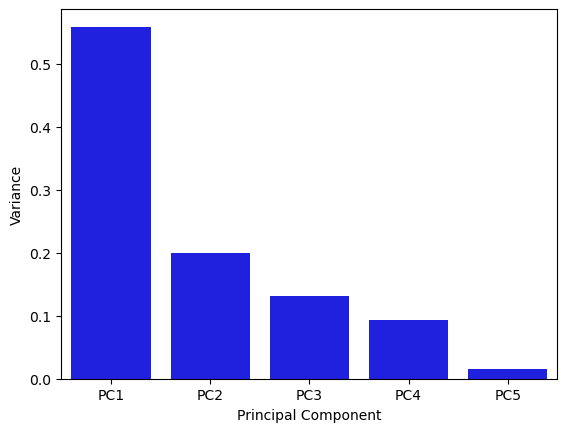

In [93]:
dataframe = pd.DataFrame({'Variance':pca.explained_variance_ratio_,'Principal Component':['PC1','PC2','PC3','PC4','PC5']})

sns.barplot(x='Principal Component',y="Variance", data=dataframe,color="b")

Here we can see that most of the variance is contributed by the first 2 or 3 componenets. let's compare the Model's Metrics with componenets 2 and 3

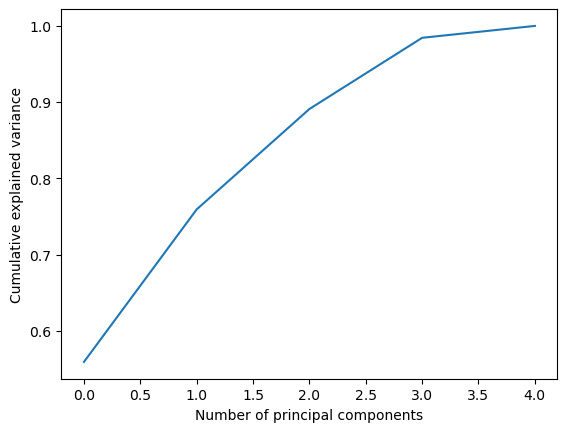

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

### PCA with 2 Components

In [95]:
pca_2 = PCA(n_components = 2)

X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)
lr_pca_2 = LinearRegression()

In [96]:
# Fitting the pca with 2 components
lr_pca_2.fit(X_train_pca_2, y_train)
y_pred_pca = lr_pca_2.predict(X_test_pca_2)


##### Metrics for the model

In [97]:
#Calculate and print metrics

from sklearn import metrics
print("R2 Score Value : {:.4f}".format(metrics.r2_score(y_test,y_pred_pca)))
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred_pca))
print("Mean Square Error : ",metrics.mean_squared_error(y_test,y_pred_pca))
print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_pca)))

R2 Score Value : 0.9907
Mean Absolute Error :  0.9300786085917744
Mean Square Error :  1.7326111034959275
Root Mean Square Error :  1.3162868621603452


### PCA with 3 Components

In [98]:
pca_3 = PCA(n_components = 3)

X_train_pca_3 = pca_3.fit_transform(X_train)
X_test_pca_3 = pca_3.transform(X_test)
lr_pca_3 = LinearRegression()

In [99]:
#Fitting the pca with 3 components

lr_pca_3.fit(X_train_pca_3, y_train)
y_pred_pca_3 = lr_pca_3.predict(X_test_pca_3)


In [100]:
#Calculate and print metrics

from sklearn import metrics
print("R2 Score Value : {:.4f}".format(metrics.r2_score(y_test,y_pred_pca_3)))
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred_pca_3))
print("Mean Square Error : ",metrics.mean_squared_error(y_test,y_pred_pca_3))
print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_pca_3)))

R2 Score Value : 0.9907
Mean Absolute Error :  0.9333637163779082
Mean Square Error :  1.7271681588201446
Root Mean Square Error :  1.3142176984123082
